In [23]:
import torch
import cv2
from PIL import Image
from torchvision import transforms as T
from torchvision import models

In [24]:
model = models.detection.maskrcnn_resnet50_fpn_v2(weights='DEFAULT').eval()
img = Image.open('test.png')

(-0.5, 699.5, 367.5, -0.5)

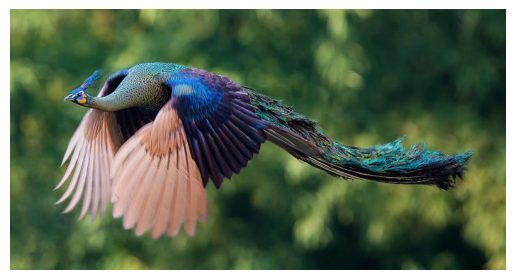

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')


In [26]:
transform = T.ToTensor()
img_tensor = transform(img)
img_tensor

tensor([[[0.5529, 0.5569, 0.5608,  ..., 0.0706, 0.0706, 0.0706],
         [0.5529, 0.5569, 0.5608,  ..., 0.0745, 0.0745, 0.0784],
         [0.5569, 0.5569, 0.5608,  ..., 0.0784, 0.0824, 0.0824],
         ...,
         [0.5137, 0.5176, 0.5137,  ..., 0.6196, 0.6196, 0.6157],
         [0.5059, 0.5098, 0.5098,  ..., 0.6118, 0.6078, 0.6078],
         [0.5020, 0.5059, 0.5059,  ..., 0.6039, 0.6039, 0.6000]],

        [[0.6392, 0.6431, 0.6471,  ..., 0.1922, 0.1922, 0.1922],
         [0.6392, 0.6431, 0.6471,  ..., 0.1961, 0.1961, 0.2000],
         [0.6431, 0.6431, 0.6471,  ..., 0.2000, 0.2039, 0.2039],
         ...,
         [0.5804, 0.5843, 0.5922,  ..., 0.6392, 0.6392, 0.6353],
         [0.5725, 0.5765, 0.5882,  ..., 0.6314, 0.6275, 0.6275],
         [0.5686, 0.5725, 0.5843,  ..., 0.6235, 0.6235, 0.6196]],

        [[0.3137, 0.3176, 0.3216,  ..., 0.1294, 0.1294, 0.1294],
         [0.3137, 0.3176, 0.3216,  ..., 0.1333, 0.1333, 0.1373],
         [0.3216, 0.3216, 0.3255,  ..., 0.1373, 0.1412, 0.

In [27]:
with torch.no_grad():
    output = model([img_tensor])

In [28]:
output

[{'boxes': tensor([[ 52.0647,  73.3242, 645.8486, 321.7999],
          [271.7499,  88.2584, 656.8094, 259.0967]]),
  'labels': tensor([16, 16]),
  'scores': tensor([0.9966, 0.2177]),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]]])}]

In [29]:
mask = output[0]['masks']

In [30]:
mask.unique()

tensor([0.0000e+00, 6.7780e-08, 7.8078e-08,  ..., 9.9986e-01, 9.9986e-01,
        9.9986e-01])

In [31]:
mask = mask[0,0] > 0.5
mask

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

(-0.5, 699.5, 367.5, -0.5)

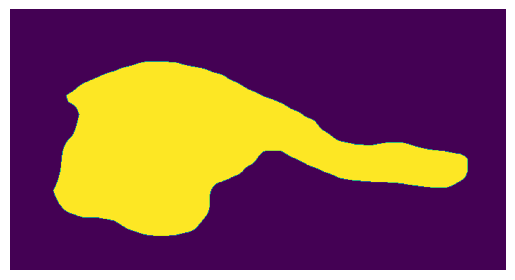

In [32]:
img_mask = mask.numpy().astype('uint8') * 255 
plt.imshow(img_mask)
plt.axis('off')


(-0.5, 699.5, 367.5, -0.5)

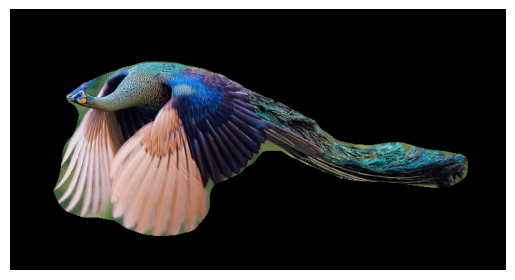

In [33]:
input_img = cv2.cvtColor(cv2.imread('test.png'),cv2.COLOR_BGR2RGB)

output_img = cv2.bitwise_and(input_img,input_img,mask=img_mask)
plt.imshow(output_img)
plt.axis('off')


(-0.5, 699.5, 367.5, -0.5)

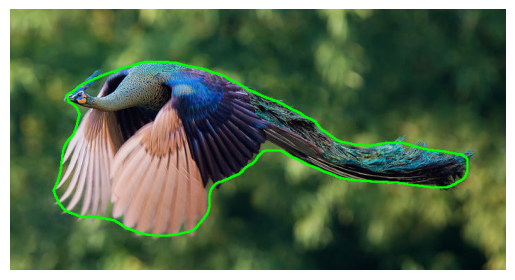

In [48]:
import numpy as np
contours, _ = cv2.findContours(mask.numpy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.polylines(input_img, contours, isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(input_img)
plt.axis('off')


In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)


In [36]:
reshaped_image = output_img.reshape(-1, 3)
reshaped_image = reshaped_image[~np.all(reshaped_image == 0, axis=1)]

In [37]:
kmeans.fit(reshaped_image)
colors = kmeans.cluster_centers_.astype(int)
colors

array([[209, 184, 182],
       [ 78, 135, 164],
       [ 77,  87,  81],
       [173, 133, 116],
       [ 23,  23,  35]])

(-0.5, 299.5, 49.5, -0.5)

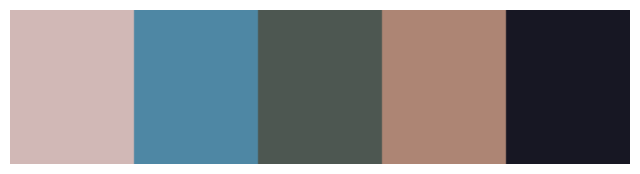

In [40]:
palette = np.zeros((50, 300, 3), dtype=np.uint8)
step = 300 // len(colors)
for i, color in enumerate(colors):
    palette[:, i * step:(i + 1) * step] = color

plt.figure(figsize=(8, 2))
plt.imshow(palette, aspect="auto")
plt.axis('off')